In [106]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from companion_planting import *


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [121]:
def draw_basic_graph(G):
    plt.figure(num=None, figsize=(14, 14))
    
    pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos)

    plt.show()


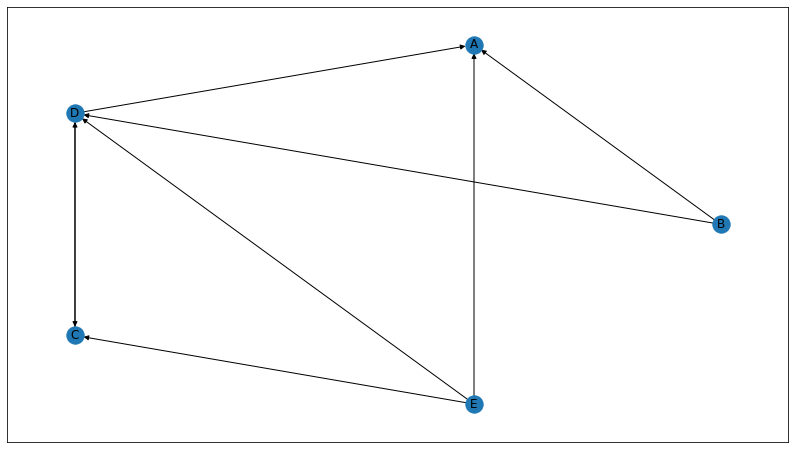

In [113]:
G = nx.DiGraph()

G.add_edges_from(
    [('B', 'A'), ('B', 'D'), ('C', 'D'), ('D', 'C'), ('D', 'A'), ('E', 'D'), ('E', 'C'), ('E', 'A')])

draw_basic_graph(G)

In [4]:
node_order = ['A', 'B', 'C', 'D', 'E']

adj_mat = nx.adjacency_matrix(G, nodelist = node_order).todense()

adj_df = pd.DataFrame(adj_mat, index = node_order, columns= node_order)

adj_df

,A,B,C,D,E
A,0,0,0,0,0
B,1,0,0,1,0
C,0,0,0,1,0
D,1,0,1,0,0
E,1,0,1,1,0


In [5]:
all_beds = get_all_beds(adj_df, row_length = 3, bed_height = 3)

all_beds

[[['B', 'D', 'A'], ['D', 'C', 'D'], ['B', 'D', 'C']],
 [['B', 'D', 'A'], ['D', 'C', 'D'], ['C', 'D', 'A']],
 [['B', 'D', 'A'], ['D', 'C', 'D'], ['C', 'D', 'C']],
 [['B', 'D', 'A'], ['D', 'C', 'D'], ['E', 'D', 'A']],
 [['B', 'D', 'A'], ['D', 'C', 'D'], ['E', 'D', 'C']],
 [['B', 'D', 'C'], ['D', 'C', 'D'], ['B', 'D', 'A']],
 [['B', 'D', 'C'], ['D', 'C', 'D'], ['C', 'D', 'A']],
 [['B', 'D', 'C'], ['D', 'C', 'D'], ['C', 'D', 'C']],
 [['B', 'D', 'C'], ['D', 'C', 'D'], ['E', 'D', 'A']],
 [['B', 'D', 'C'], ['D', 'C', 'D'], ['E', 'D', 'C']],
 [['C', 'D', 'A'], ['D', 'C', 'D'], ['B', 'D', 'A']],
 [['C', 'D', 'A'], ['D', 'C', 'D'], ['B', 'D', 'C']],
 [['C', 'D', 'A'], ['D', 'C', 'D'], ['C', 'D', 'C']],
 [['C', 'D', 'A'], ['D', 'C', 'D'], ['E', 'D', 'A']],
 [['C', 'D', 'A'], ['D', 'C', 'D'], ['E', 'D', 'C']],
 [['C', 'D', 'C'], ['D', 'C', 'D'], ['B', 'D', 'A']],
 [['C', 'D', 'C'], ['D', 'C', 'D'], ['B', 'D', 'C']],
 [['C', 'D', 'C'], ['D', 'C', 'D'], ['C', 'D', 'A']],
 [['C', 'D', 'C'], ['D', 'C'

In [130]:

def split_string(x):
    if x is np.nan:
        return x
    else:
        return x.split(", ")

plant_data = pd.read_csv("companion_planting_data.csv")

plant_data['companions'] = plant_data['companions'].apply(split_string)
plant_data['foes'] = plant_data['foes'].apply(split_string)

def get_plant_connections(plant_data, all_plants, plant_name):

    plant_df = plant_data.loc[plant_data["plant"] == plant_name,].reset_index()
    plant_height = plant_df["height_max"][0]
    foes = plant_df["foes"][0]
    companions = plant_df["companions"][0]
    
#    if foes is np.nan:
#        connections = [plant for plant in all_plants if plant != plant_name]
#    else:
#        connections = [plant for plant in all_plants if plant not in foes and plant != plant_name]
        
    connections = [plant for plant in all_plants if plant != plant_name]

    connections_list = []

    for connection_plant_name in connections:
        connection_plant_height = plant_data.loc[plant_data['plant'] == connection_plant_name, "height_max"].values

        if companions is np.nan:
            is_companion = False
        else:
            is_companion = connection_plant_name in companions
        
        if foes is np.nan:
            is_foe = False
        else: 
            is_foe = connection_plant_name in foes
        
        if connection_plant_height <= plant_height:
            connections_list.append([plant_name, connection_plant_name, is_companion, is_foe])
            
        if connection_plant_height >= plant_height:
            connections_list.append([connection_plant_name, plant_name, is_companion, is_foe])
       
    return connections_list

def get_all_plant_connections(plant_data):
    
    all_plants = plant_data['plant'].values

    all_plant_connections = []
    
    for plant_name in all_plants:
        plant_connections = get_plant_connections(plant_data, all_plants, plant_name)
        all_plant_connections = all_plant_connections + plant_connections
        
    all_plant_connections_df = pd.DataFrame(all_plant_connections, columns = ["taller_plant", "shorter_plant", "companions", "foes"])
    
    all_plant_connections_unique = all_plant_connections_df.groupby(["taller_plant", "shorter_plant"])\
        .agg({'foes': 'any', 'companions': 'any'}).reset_index()

    return all_plant_connections_unique 
    
all_plant_connections = get_all_plant_connections(plant_data)

all_plant_connections.head(15)


,taller_plant,shorter_plant,foes,companions
0,basil,arugula,False,False
1,basil,beets,False,False
2,basil,carrots,False,False
3,basil,lettuce,False,True
4,basil,onions,False,False
5,basil,parsley,False,False
6,basil,spinach,False,False
7,beets,arugula,False,True
8,beets,carrots,False,False
9,beets,lettuce,False,True


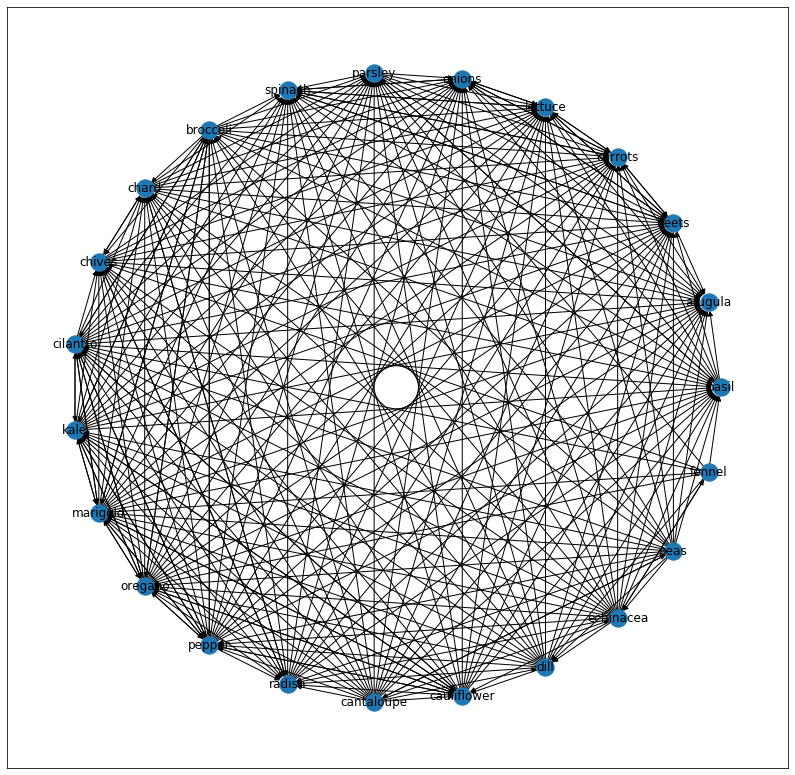

In [134]:
all_pairs = all_plant_connections.loc[~all_plant_connections['foes'], ['taller_plant', 'shorter_plant']].values

G = nx.DiGraph()

G.add_edges_from(list(map(tuple, all_pairs)))

draw_basic_graph(G)

In [135]:
node_order = all_plants

adj_mat_plants = nx.adjacency_matrix(G, nodelist = node_order).todense()

adj_df_plants = pd.DataFrame(adj_mat_plants, index = all_plants, columns= all_plants)

adj_df_plants

,arugula,basil,beets,broccoli,cantaloupe,carrots,cauliflower,chives,cilantro,dill,...,lettuce,marigold,onions,oregano,parsley,peas,pepper,radish,chard,spinach
arugula,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
basil,1,0,1,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
beets,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
broccoli,1,1,1,0,0,1,0,1,1,0,...,1,1,1,1,1,0,1,1,1,1
cantaloupe,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
carrots,1,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
cauliflower,1,1,1,0,0,1,0,1,1,0,...,1,1,1,1,1,0,1,1,1,1
chives,1,1,1,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
cilantro,1,1,1,1,0,1,1,1,0,0,...,1,1,1,1,1,0,1,1,1,1
dill,1,1,1,1,0,0,1,1,1,0,...,1,1,1,1,1,0,1,1,1,1
